In [30]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta


In [31]:
import pandas as pd

# Load the dataset
df_data_matches = pd.read_csv('data_matches.csv')

# Display the first few rows of the dataframe
print(df_data_matches.head())

# Check for any missing values and data types
print(df_data_matches.info())



    user_id activity_date match_type  finish_position  bots  n_matches
0  306741.0    01/03/2024          A              4.0     2          1
1  306039.0    01/03/2024          C              4.0     0          1
2  306039.0    01/03/2024          C              3.0     0          1
3  287555.0    01/03/2024          A              1.0     3          1
4  287555.0    01/03/2024          A              2.0     3          4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443380 entries, 0 to 443379
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          443380 non-null  float64
 1   activity_date    443380 non-null  object 
 2   match_type       443380 non-null  object 
 3   finish_position  439783 non-null  float64
 4   bots             443380 non-null  int64  
 5   n_matches        443380 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 20.3+ MB
None


In [32]:
# Check for missing values
print(df_data_matches.isnull().sum())

# Handling missing values if necessary
df_data_matches.dropna(inplace=True)

user_id               0
activity_date         0
match_type            0
finish_position    3597
bots                  0
n_matches             0
dtype: int64


In [33]:
# Basic Descriptive Statistics
# Get an overview of the numerical columns to understand the distribution of data:

# Get descriptive statistics for numerical columns
print(df_data_matches.describe())

             user_id  finish_position           bots      n_matches
count  439783.000000    439783.000000  439783.000000  439783.000000
mean   290676.074087         2.513158       1.196520       1.714923
std     10826.396405         1.128709       1.101346       1.251691
min    272069.000000         1.000000       0.000000       1.000000
25%    281328.000000         1.000000       0.000000       1.000000
50%    290423.000000         3.000000       1.000000       1.000000
75%    300304.000000         4.000000       2.000000       2.000000
max    309402.000000         4.000000       3.000000      19.000000


In [34]:
# Analyze Match Types and Performance
# Examine the distribution of matches across different types and user performance:
# Distribution of match types
match_type_counts = df_data_matches['match_type'].value_counts()
print(match_type_counts)

# Average finish position per match type
avg_finish_position = df_data_matches.groupby('match_type')['finish_position'].mean().reset_index()
print(avg_finish_position)

match_type
A    178480
B    144866
C    116437
Name: count, dtype: int64
  match_type  finish_position
0          A         2.501709
1          B         2.548037
2          C         2.487311


In [35]:
# Analyze User Performance
# Identify the best and worst-performing users based on their average finish position:

# Average finish position per user
user_performance = df_data_matches.groupby('user_id')['finish_position'].mean().reset_index()
user_performance = user_performance.sort_values(by='finish_position')  # Lower finish positions are better

# Top 10 best-performing users
print(user_performance.head(10))

# Top 10 worst-performing users
print(user_performance.tail(10))

        user_id  finish_position
14100  290732.0              1.0
16630  294077.0              1.0
16627  294073.0              1.0
7046   281332.0              1.0
7047   281333.0              1.0
16626  294072.0              1.0
16618  294063.0              1.0
7041   281327.0              1.0
24409  304386.0              1.0
16611  294053.0              1.0
        user_id  finish_position
13770  290279.0              4.0
8702   283562.0              4.0
13670  290145.0              4.0
8727   283590.0              4.0
1444   273975.0              4.0
25093  305273.0              4.0
26171  306726.0              4.0
25102  305289.0              4.0
27471  308446.0              4.0
27158  308031.0              4.0


In [36]:
# Analyze the Impact of Bots on Match Outcomes
# Investigate whether matches involving bots have different outcomes:

# Matches with and without bots
matches_with_bots = df_data_matches[df_data_matches['bots'] > 0]
matches_without_bots = df_data_matches[df_data_matches['bots'] == 0]

# Average finish position in matches with and without bots
avg_finish_with_bots = matches_with_bots['finish_position'].mean()
avg_finish_without_bots = matches_without_bots['finish_position'].mean()

print(f"Average Finish Position with Bots: {avg_finish_with_bots}")
print(f"Average Finish Position without Bots: {avg_finish_without_bots}")

Average Finish Position with Bots: 2.4528981712298634
Average Finish Position without Bots: 2.625700145408546


In [37]:
# Analyze User Engagement
# Look into user engagement by the number of matches played:

# Total number of matches played by each user
user_engagement = df_data_matches.groupby('user_id')['n_matches'].sum().reset_index()
user_engagement = user_engagement.sort_values(by='n_matches', ascending=False)

# Top 10 most engaged users
print(user_engagement.head(10))

        user_id  n_matches
20763  299547.0       3154
26368  306975.0       2487
25823  306255.0       2432
5289   279001.0       2428
18410  296423.0       2281
4930   278513.0       2160
7817   282387.0       2090
5843   279753.0       1984
8734   283604.0       1925
10412  285829.0       1776


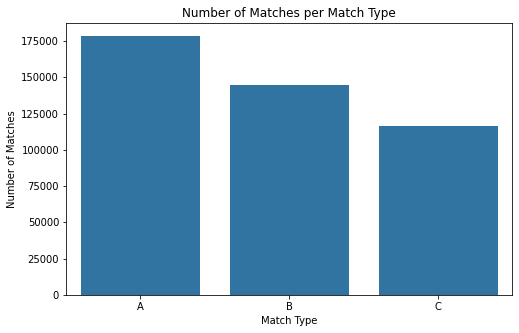

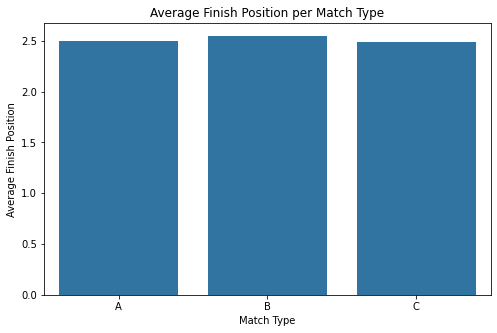

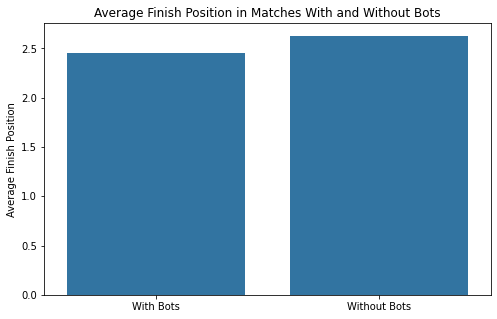

In [38]:
# Visualize Insights
# Use visualizations to make the data more understandable:

import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for match type counts
plt.figure(figsize=(8, 5))
sns.barplot(x=match_type_counts.index, y=match_type_counts.values)
plt.title('Number of Matches per Match Type')
plt.xlabel('Match Type')
plt.ylabel('Number of Matches')
plt.show()

# Distribution of average finish position per match type
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_finish_position, x='match_type', y='finish_position')
plt.title('Average Finish Position per Match Type')
plt.xlabel('Match Type')
plt.ylabel('Average Finish Position')
plt.show()

# Distribution of average finish position with and without bots
plt.figure(figsize=(8, 5))
sns.barplot(x=['With Bots', 'Without Bots'], y=[avg_finish_with_bots, avg_finish_without_bots])
plt.title('Average Finish Position in Matches With and Without Bots')
plt.ylabel('Average Finish Position')
plt.show()

period
01/03/2024 to 06/03/2024    14304
06/03/2024 to 11/03/2024    18506
11/03/2024 to 16/03/2024    24168
16/03/2024 to 21/03/2024    29877
21/03/2024 to 26/03/2024    32603
26/03/2024 to 31/03/2024    37907
31/03/2024 to 05/04/2024    39538
05/04/2024 to 10/04/2024    43082
10/04/2024 to 15/04/2024    46519
15/04/2024 to 20/04/2024    49675
20/04/2024 to 25/04/2024    52443
25/04/2024 to 30/04/2024    42517
dtype: int64


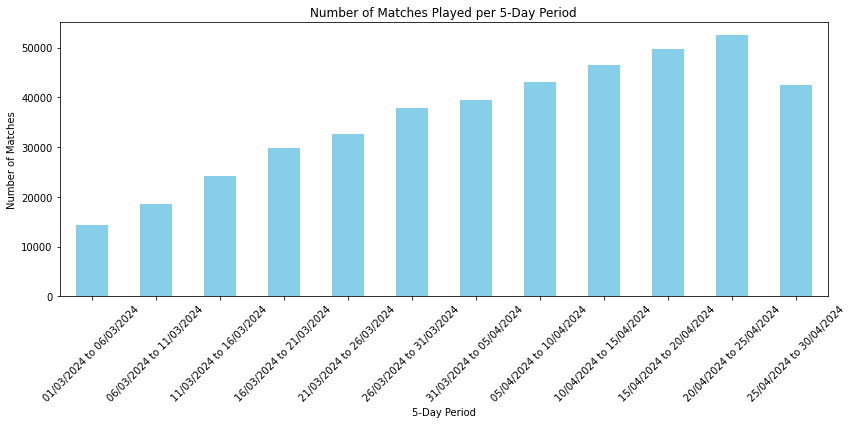

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'activity_date' to datetime format
df_data_matches['activity_date'] = pd.to_datetime(df_data_matches['activity_date'], format='%d/%m/%Y')

# Determine the start and end dates
start_date = df_data_matches['activity_date'].min()
end_date = df_data_matches['activity_date'].max()

# Create 5-day periods
bins = pd.date_range(start=start_date, end=end_date + pd.Timedelta(days=1), freq='5D')
labels = [f'{bins[i].strftime("%d/%m/%Y")} to {bins[i + 1].strftime("%d/%m/%Y")}' for i in range(len(bins) - 1)]

# Add the bins to the DataFrame
df_data_matches['period'] = pd.cut(df_data_matches['activity_date'], bins=bins, labels=labels, include_lowest=True)

# Count the number of matches per period with observed=True to avoid future warnings
matches_per_period = df_data_matches.groupby('period', observed=True).size()

# Print results
print(matches_per_period)

# Plotting
plt.figure(figsize=(12, 6))
matches_per_period.plot(kind='bar', color='skyblue')
plt.title('Number of Matches Played per 5-Day Period')
plt.xlabel('5-Day Period')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Average Finish Position for Each Number of Bots:
   bots  finish_position
0     0         2.625700
1     1         2.627094
2     2         2.609919
3     3         2.010644


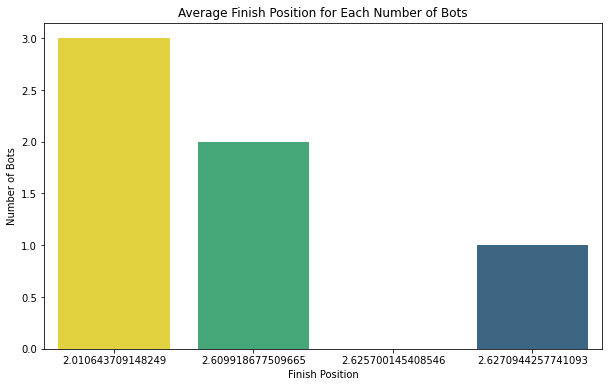

In [40]:
# Calculate the average finish_position for each number of bots
average_finish_position = df_data_matches.groupby('bots')['finish_position'].mean().reset_index()

# Print the results
print("Average Finish Position for Each Number of Bots:")
print(average_finish_position)

# Optionally, plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='finish_position', y='bots', data=average_finish_position, hue='bots', palette='viridis', legend=False)
plt.title('Average Finish Position for Each Number of Bots')
plt.xlabel('Finish Position')
plt.ylabel('Number of Bots')
plt.show()


In [41]:


# Calculate the total number of matches and number of first-place finishes for each number of bots
total_matches = df_data_matches.groupby('bots').size()
first_place_finishes = df_data_matches[df_data_matches['finish_position'] == 1].groupby('bots').size()

# Calculate the percentage of first-place finishes
percentage_first_place = (first_place_finishes / total_matches * 100).fillna(0).reset_index()
percentage_first_place.columns = ['bots', 'percentage_first_place']

# Find the bot number with the highest percentage of first-place finishes
max_percentage_bot = percentage_first_place.loc[percentage_first_place['percentage_first_place'].idxmax()]

# Print the results
print("Percentage of First-Place Finishes for Each Number of Bots:")
print(percentage_first_place)
print("\nBot Number with Highest Percentage of First-Place Finishes:")
print(max_percentage_bot)


Percentage of First-Place Finishes for Each Number of Bots:
   bots  percentage_first_place
0     0               20.553465
1     1               20.443352
2     2               22.819988
3     3               45.846792

Bot Number with Highest Percentage of First-Place Finishes:
bots                       3.000000
percentage_first_place    45.846792
Name: 3, dtype: float64


In [42]:

from datetime import timedelta

# Define the date range for the analysis
end_date = df_data_matches['activity_date'].max()
start_date = end_date - timedelta(days=60)  # Changed to 60 days for consistency with filtering

# Filter data for the last 60 days
filtered_df = df_data_matches[(df_data_matches['activity_date'] >= start_date) & (df_data_matches['activity_date'] <= end_date)]

# Calculate the total number of matches played by each player
player_match_counts = filtered_df.groupby('user_id')['n_matches'].sum().reset_index()
player_match_counts.rename(columns={'n_matches': 'total_matches'}, inplace=True)

# Determine the thresholds for activity levels
very_high_threshold = player_match_counts['total_matches'].quantile(0.9)
high_threshold = player_match_counts['total_matches'].quantile(0.7)
medium_threshold = player_match_counts['total_matches'].quantile(0.4)
low_threshold = player_match_counts['total_matches'].quantile(0.2)


# Merge activity levels back into the original filtered DataFrame
filtered_df = filtered_df.merge(player_match_counts[['user_id', 'activity_level']], on='user_id', how='left')

# Calculate summary statistics for each activity level
activity_summary = filtered_df.groupby('activity_level').agg(
    total_matches=('n_matches', 'sum'),
    player_count=('user_id', 'nunique'),
    average_bots_per_match=('bots', 'mean'),
    average_position_per_match=('finish_position', 'mean')
).reset_index()

# Calculate total number of players
total_players = activity_summary['player_count'].sum()

# Calculate player count percentage
activity_summary['player_percentage'] = (activity_summary['player_count'] / total_players) * 100

# Calculate total number of matches
total_matches_played = activity_summary['total_matches'].sum()

# Calculate match count percentage
activity_summary['match_percentage'] = (activity_summary['total_matches'] / total_matches_played) * 100

# Print the results
print("Player Activity Summary (Last 60 Days):")
print(activity_summary)


KeyError: "['activity_level'] not in index"

In [43]:

# Define the date range for the analysis
end_date = df_data_matches['activity_date'].max()
start_date = end_date - timedelta(days=62)  # Use 62 days as specified

# Filter data for the last 62 days
filtered_df = df_data_matches[(df_data_matches['activity_date'] >= start_date) & (df_data_matches['activity_date'] <= end_date)]

# Calculate the total number of matches played by each player
player_match_counts = filtered_df.groupby('user_id').agg(
    total_matches=('n_matches', 'sum'),
    average_bots_per_match=('bots', 'mean'),
    average_position_per_match=('finish_position', 'mean'),
    first_activity_date=('activity_date', 'min'),
    last_activity_date=('activity_date', 'max')
).reset_index()


# Calculate the number of days of activity
player_match_counts['number_of_days'] = ((player_match_counts['last_activity_date'] - player_match_counts['first_activity_date']).dt.days) + 1

# Sort players by their user_id, reset index, and round float columns
sorted_player_list = player_match_counts.sort_values(by='user_id', ascending=True).reset_index(drop=True)

# Round float columns to 2 decimal places
for col in sorted_player_list.columns:
    if sorted_player_list[col].dtype == 'float64':
        sorted_player_list[col] = sorted_player_list[col].round(2)

# Change the data type of user_id
sorted_player_list['user_id'] = sorted_player_list['user_id'].astype(int)

# Print the list of players with their frequency
print("List of Players with Their Frequency (Last 62 Days):")
print(sorted_player_list.head())


List of Players with Their Frequency (Last 62 Days):
   user_id  total_matches  average_bots_per_match  average_position_per_match  \
0   272069              7                    0.80                        2.80   
1   272070            662                    1.15                        2.61   
2   272071             17                    1.80                        2.73   
3   272073              2                    3.00                        2.00   
4   272077              3                    3.00                        3.00   

  first_activity_date last_activity_date  number_of_days  
0          2024-04-12         2024-04-20               9  
1          2024-03-19         2024-05-01              44  
2          2024-04-15         2024-04-27              13  
3          2024-04-12         2024-04-12               1  
4          2024-03-27         2024-04-30              35  


In [44]:
# Group by user_id and count unique activity dates
activity_days_summary = df_data_matches.groupby('user_id')['activity_date'].nunique().reset_index()
activity_days_summary.rename(columns={'activity_date': 'unique_activity_days'}, inplace=True)

# Print the results
print("Number of Unique Activity Days for Each Player:")
print(activity_days_summary)


Number of Unique Activity Days for Each Player:
        user_id  unique_activity_days
0      272069.0                     2
1      272070.0                    44
2      272071.0                     6
3      272073.0                     1
4      272077.0                     3
...         ...                   ...
28197  309398.0                     2
28198  309399.0                     1
28199  309400.0                     1
28200  309401.0                     1
28201  309402.0                     4

[28202 rows x 2 columns]


In [45]:
data_matches_summary = pd.merge(sorted_player_list, activity_days_summary, on='user_id', how='inner')
data_matches.head()

,user_id,total_matches,average_bots_per_match,average_position_per_match,first_activity_date,last_activity_date,number_of_days,unique_activity_days
0,272069,7,0.80,2.80,2024-04-12,2024-04-20,9,2
1,272070,662,1.15,2.61,2024-03-19,2024-05-01,44,44
2,272071,17,1.80,2.73,2024-04-15,2024-04-27,13,6
3,272073,2,3.00,2.00,2024-04-12,2024-04-12,1,1
4,272077,3,3.00,3.00,2024-03-27,2024-04-30,35,3


In [48]:
data_matches.to_csv('data_matches_summary.csv',index=False)